In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file = 'unconv_MV_v5.csv'
df = pd.read_csv(file)

In [3]:
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

In [4]:
X.shape,Y.shape

((200, 2), (200,))

In [6]:
x = X[:, 0]
y = X[:, 1]
z = Y
x.shape,y.shape,z.shape

((200,), (200,), (200,))

In [7]:
x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)

In [8]:
x_pred.shape,y_pred.shape

((30,), (30,))

In [9]:
xx_pred.shape, yy_pred.shape

((30, 30), (30, 30))

In [14]:
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [15]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

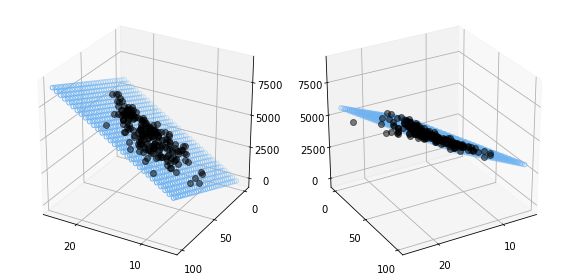

In [29]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.locator_params(nbins=3, axis='x')
    ax.locator_params(nbins=3, axis='y')
    ax.locator_params(nbins=4, axis='z')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=28, azim=60)

fig.tight_layout()

In [48]:
dim = 3
mean = np.zeros((dim,))
cov = np.eye(dim)

In [49]:
mean,cov

(array([0., 0., 0.]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [50]:
X = np.random.multivariate_normal(mean, cov, 100)

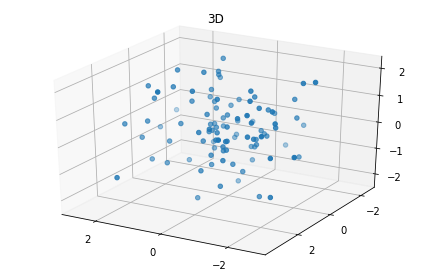

In [56]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='y')
ax.locator_params(nbins=5, axis='z')

ax.view_init(elev=28, azim=120)

plt.title('3D')
fig.tight_layout()